**Поля**
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

**Задача**
 * Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
 * Посмотрите на распределение признака для числовых переменных, устраните выбросы.
 * Оцените количество уникальных значений для номинативных переменных.
 * По необходимости преобразуйте данные
 * Проведите корреляционный анализ количественных переменных
 * Отберите не коррелирующие переменные.
 * Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
 * Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math as math

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')


Так, теперь посмотрим что у нас в данных с смысле сигнал/шум

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


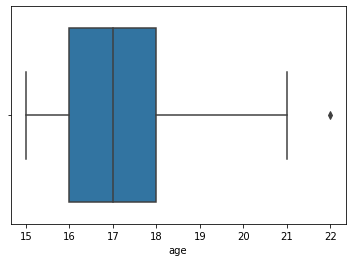

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


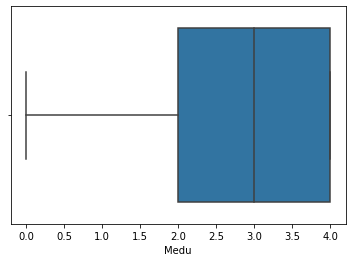

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


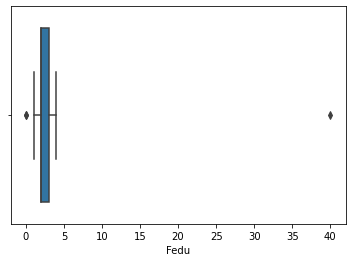

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


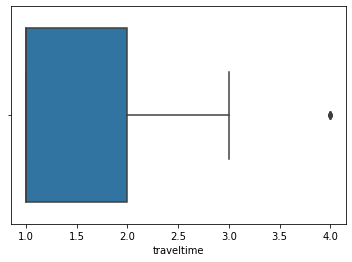

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


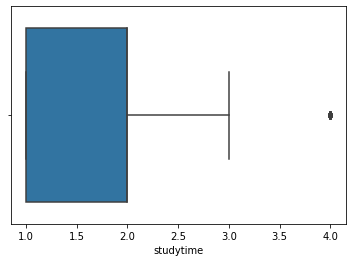

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


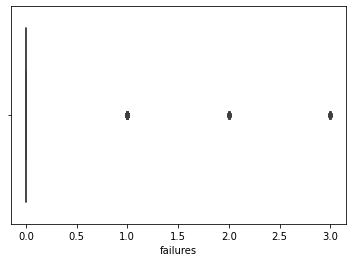

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64


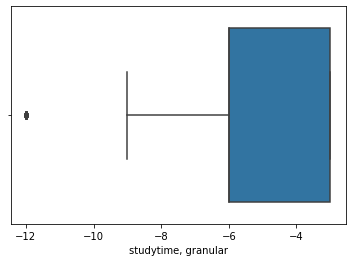

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


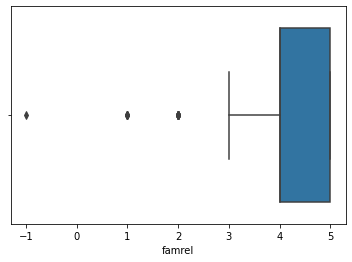

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


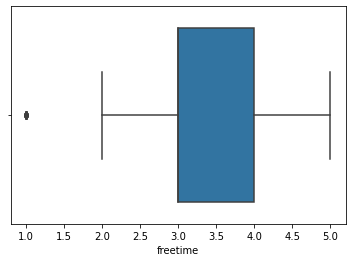

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


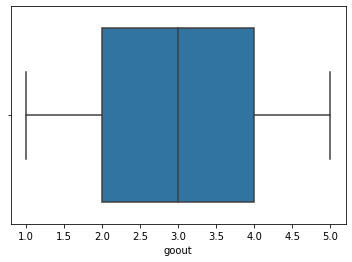

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


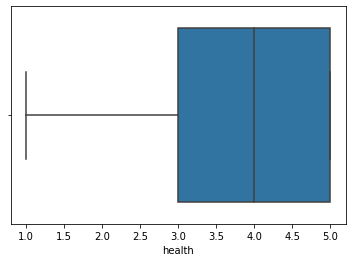

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


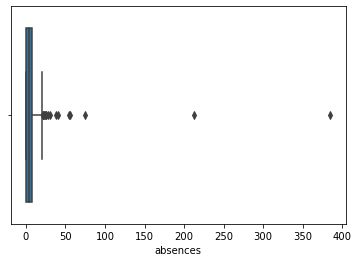

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


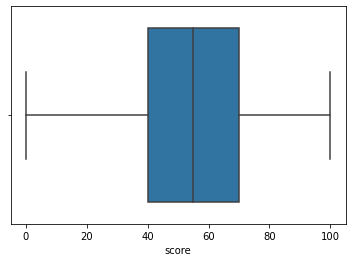

GP    349
MS     46
Name: school, dtype: int64 [ 0 / 395 ] NaN
F    208
M    187
Name: sex, dtype: int64 [ 0 / 395 ] NaN
U      295
R       83
NaN     17
Name: address, dtype: int64 [ 17 / 395 ] NaN
GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64 [ 27 / 395 ] NaN
T      314
NaN     45
A       36
Name: Pstatus, dtype: int64 [ 45 / 395 ] NaN
other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64 [ 19 / 395 ] NaN
other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64 [ 36 / 395 ] NaN
course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64 [ 17 / 395 ] NaN
mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64 [ 31 / 395 ] NaN
no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64 [ 9 / 395 ] NaN
yes    219
no     137
NaN     39
Name: famsup, dtype: 

school        None
sex           None
address       None
famsize       None
Pstatus       None
Mjob          None
Fjob          None
reason        None
guardian      None
schoolsup     None
famsup        None
paid          None
activities    None
nursery       None
higher        None
internet      None
romantic      None
dtype: object

In [2]:
# and check some numbers
def is_numeric_series(s):
    return pd.api.types.is_integer_dtype(series) or\
    pd.api.types.is_float_dtype(series)

numeric_fields = []
string_fields = []

for (columnName, columnData) in df.iteritems():
    series = pd.Series(columnData)
    if(is_numeric_series(series)):
        numeric_fields.append(columnName)
        sns.boxplot(series)
        print(series.describe())
        plt.show()
    else:
        string_fields.append(columnName)

# ok, what do we have here?
df[string_fields].apply(lambda s: print(s.value_counts(dropna=False), '[',
                        s.isna().sum(), '/',
                        s.value_counts(dropna=False).sum(),
                        '] NaN'))


Самый пустой столбец - _PStatus_, но в принципе данные не выглядят слишком побитыми  

*Философские вопросы/соображения:*  
 1. можно ли `NaN` объединить с other там, где есть этот вариант? Звучит логично по крайней мере для _Mjob/Fjob/reason/guardian_, так как в обоих случаях данных нет. Хотя, возможно, логичней было бы заменить other на `NaN`, чтобы иллюзий не питать?)  
 2. _Fedu_ `40` — единственный адский выброс — я бы (в нарушение канона?) счел пропущенной точкой в `4.0`, но все же буду чистить, не сделает он погоды, почищу как не входящий в заявленную размерность.  
 3. _absences_ — жуткие выбросы, но количество пропусков по идее сильно влияет на успеваемость, может, попробовать сделать еще столбец про них, с размерностью типа `1..4` (нет, не много, многовато, огого сколько), должна быть сильная корреляция. Интересно, это в часах? С первого класса?  
 4. _age_, _Medu_, _traveltime_, _studytime_, _studytime, granular_, _failures_, _freetime_, _goout_ — не надо чистить выбросы, даже если они формально есть: данные попадают в размерность, все логично  
 5. _famrel_ убрать `-1`  
 6. В строковых данных синонимизировать ничего не надо, только с `NaN` разобраться (кроме проверки идеи из п 1).  
 7. В _score_ — интересно, что значит `0`? Не пришел? Интересно, что это в принципе значит.

По-хорошему, конечно, надо _absences_ почистить и сравнить с предположением. Хотя `400` — за гранью, конечно, значение. 

Наверное, стоит проанализировать выкинув по-честному все что не подходит, второй анализ провести.

In [3]:
def break_into_quantiles_and_outliers_bins(frame, col_name, suffix):
    q1_temp = frame[col_name].quantile(0.25, interpolation='midpoint')
    q2_temp = frame[col_name].quantile(0.5, interpolation='midpoint')
    q3_temp = frame[col_name].quantile(0.75, interpolation='midpoint')
    iqr = q3_temp - q1_temp
    frame[col_name + suffix] = frame[col_name].apply(lambda x: 0 if (q1_temp - 1.5 * iqr > x) else (
        1 if x >= q1_temp - 1.5 * iqr and x < q1_temp else (
        2 if x >= q1_temp and x < q2_temp else (
        3 if x >= q2_temp and x < q3_temp else (
        4 if x >= q3_temp and q3_temp + 1.5 * iqr >= x else 5)))))


def clean_outliers(frame, col_name, suffix):
    q1_temp = frame[col_name].quantile(0.25, interpolation='midpoint')
    q3_temp = frame[col_name].quantile(0.75, interpolation='midpoint')
    iqr = q3_temp - q1_temp
    has_outliers = q3_temp + 1.5 * \
        iqr < frame[col_name].max() or q1_temp - 1.5 * \
        iqr > frame[col_name].min()
    frame[col_name + suffix] = frame[col_name].apply(lambda x: None if (
        q3_temp + 1.5 * iqr < x or q1_temp - 1.5 * iqr > x) else x)


def clean_out_of_range(frame, col_name, suffix, min_val, max_val):
    frame[col_name + suffix] = frame[col_name].apply(
        lambda x: None if (x < min_val or x > max_val) else x)


# clean up to fit in range
clean_out_of_range(df, 'Medu', '', 1, 4)
clean_out_of_range(df, 'Fedu', '', 1, 4)
clean_out_of_range(df, 'famrel', '', 1, 4)

# first pass on absences
clean_outliers(df, 'absences', '_flat_cleaned')
# print(df.absences_flat_cleaned.value_counts(dropna = False))

# and a test of data mapping
break_into_quantiles_and_outliers_bins(
    df, 'absences', '_experimentally_mapped')
# print(df.absences_experimentally_mapped.value_counts(dropna = False))

# try to join NaN with 'other' to compare
for item in ['Mjob', 'Fjob', 'reason', 'guardian']:
    df[item + '_other_joined'] = df[item].apply(
        lambda x: 'other' if pd.isnull(x) else x)

# cleanup NaNs from all string columns - just to be sure
for item in string_fields:
    df[item] = df[item].apply(lambda x: None if pd.isnull(x) else x)


Итак, вроде все удалось почистить, + нагенерил еще несколько дополнительных полей, дальнейший план:  
1. Посмотреть `corr()`, чтобы оценить как поведение, описать выводы, отдельно посмотреть на соответствие _absences_flat_cleaned_ и _absences_experimentally_mapped_
2. Потом прогнать `boxplot()` по всем строковым полям, отдельно посмотреть на отношение `_other_joined` вариантов к обычным почищенным
    
    

In [4]:
df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped
age,1.000000,-0.156606,-0.174493,0.081508,-0.015556,0.228047,0.015556,0.068853,0.029023,0.135107,-0.065946,0.093592,-0.155726,0.151493,0.165971
Medu,-0.156606,1.000000,0.642325,-0.182011,0.079899,-0.237660,-0.079899,-0.087150,0.028196,0.051839,-0.039491,-0.018067,0.230728,0.050768,0.086483
Fedu,-0.174493,0.642325,1.000000,-0.147423,0.024000,-0.277091,-0.024000,-0.029155,-0.018049,0.040199,0.008538,0.022243,0.139615,-0.020560,0.071214
traveltime,0.081508,-0.182011,-0.147423,1.000000,-0.102206,0.064699,0.102206,-0.000097,-0.021937,0.037636,-0.021531,-0.048215,-0.070559,-0.047995,-0.060855
studytime,-0.015556,0.079899,0.024000,-0.102206,1.000000,-0.178992,-1.000000,0.024435,-0.121969,-0.051280,-0.080016,-0.026544,0.115741,-0.078099,-0.054669
failures,0.228047,-0.237660,-0.277091,0.064699,-0.178992,1.000000,0.178992,-0.009424,0.098382,0.120914,0.081284,0.057391,-0.344338,0.081801,0.091323
"studytime, granular",0.015556,-0.079899,-0.024000,0.102206,-1.000000,0.178992,1.000000,-0.024435,0.121969,0.051280,0.080016,0.026544,-0.115741,0.078099,0.054669
famrel,0.068853,-0.087150,-0.029155,-0.000097,0.024435,-0.009424,-0.024435,1.000000,0.160189,0.060095,0.151774,-0.130516,0.005417,-0.080945,-0.068072
freetime,0.029023,0.028196,-0.018049,-0.021937,-0.121969,0.098382,0.121969,0.160189,1.000000,0.296437,0.061575,0.009292,0.019026,0.093436,-0.010600
goout,0.135107,0.051839,0.040199,0.037636,-0.051280,0.120914,0.051280,0.060095,0.296437,1.000000,-0.015608,-0.048738,-0.129685,0.111587,0.113200


Итак, первичные количественные выводы:  
 1. Основные положительные факторы - образование родителей, причем *образование матери сильнее всего* (проверить с _guardian_), время учебы (кто бы мог подумать)  
 2. Второстепенные положительные факторы (по убыванию) - пропуски (не могу понять как так получилось, надо копать глубже), свободное время, отношения в семье влияют совсем слабо  
 3. Отрицательные факторы (по убыванию) - прочие неудачи, возраст (проверить с _romantic_), время с друзьями, время до школы, здоровье (странно)


In [5]:
# df[(df.guardian == 'father')].corr()
df[(df.guardian == 'mother')].corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped
age,1.000000,-0.120993,-0.113982,0.120556,-0.012252,0.162312,0.012252,0.092452,0.017180,0.144224,-0.049552,0.012711,-0.221558,0.134606,0.114358
Medu,-0.120993,1.000000,0.676625,-0.214142,0.088323,-0.280787,-0.088323,-0.030872,0.102763,0.011590,-0.055875,-0.020718,0.280485,0.064530,0.076280
Fedu,-0.113982,0.676625,1.000000,-0.199260,0.068321,-0.329660,-0.068321,0.009786,0.069133,0.019303,-0.005602,0.049301,0.201571,0.006211,0.113934
traveltime,0.120556,-0.214142,-0.199260,1.000000,-0.098788,0.044123,0.098788,0.155954,-0.001054,-0.002327,0.042133,-0.062835,-0.070279,-0.189085,-0.161168
studytime,-0.012252,0.088323,0.068321,-0.098788,1.000000,-0.248740,-1.000000,-0.030279,-0.167716,-0.023753,-0.097191,-0.030165,0.106270,-0.101455,-0.082047
failures,0.162312,-0.280787,-0.329660,0.044123,-0.248740,1.000000,0.248740,-0.054250,0.069228,0.107825,0.099494,0.003245,-0.295645,0.109639,0.102026
"studytime, granular",0.012252,-0.088323,-0.068321,0.098788,-1.000000,0.248740,1.000000,0.030279,0.167716,0.023753,0.097191,0.030165,-0.106270,0.101455,0.082047
famrel,0.092452,-0.030872,0.009786,0.155954,-0.030279,-0.054250,0.030279,1.000000,0.200041,0.121645,0.171075,-0.153047,-0.055373,-0.036906,-0.065977
freetime,0.017180,0.102763,0.069133,-0.001054,-0.167716,0.069228,0.167716,0.200041,1.000000,0.270571,0.008291,-0.024921,0.010340,0.120342,0.012785
goout,0.144224,0.011590,0.019303,-0.002327,-0.023753,0.107825,0.023753,0.121645,0.270571,1.000000,-0.045350,-0.103901,-0.146235,0.108122,0.101255


In [6]:
df[(df.Pstatus == 'A') & (df.guardian == 'father')].corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped
age,1.000000,-0.852803,-0.090909,-0.522233,-0.246183,0.301511,0.246183,-0.866025,-0.484200,-0.818182,-0.301511,-0.413670,-0.845333,-0.413670,-0.636364
Medu,-0.852803,1.000000,0.000000,0.816497,-0.288675,0.000000,0.288675,0.500000,0.648886,0.852803,0.707107,0.363803,0.762493,0.363803,0.426401
Fedu,-0.090909,0.000000,1.000000,-0.522233,0.000000,-0.904534,0.000000,0.000000,-0.760886,-0.454545,0.301511,0.930758,0.585230,0.930758,0.818182
traveltime,-0.522233,0.816497,-0.522233,1.000000,-0.471405,0.577350,0.471405,NaN,0.927173,0.870388,0.577350,-0.198030,0.249029,-0.198030,-0.174078
studytime,-0.246183,-0.288675,0.000000,-0.471405,1.000000,-0.408248,-1.000000,0.944911,-0.187317,0.000000,-0.816497,-0.070014,0.044023,-0.070014,0.246183
failures,0.301511,0.000000,-0.904534,0.577350,-0.408248,1.000000,0.408248,-0.500000,0.688247,0.301511,0.000000,-0.857493,-0.646997,-0.857493,-0.904534
"studytime, granular",0.246183,0.288675,0.000000,0.471405,-1.000000,0.408248,1.000000,-0.944911,0.187317,0.000000,0.816497,0.070014,-0.044023,0.070014,-0.246183
famrel,-0.866025,0.500000,0.000000,NaN,0.944911,-0.500000,-0.944911,1.000000,0.500000,1.000000,-0.500000,0.142857,0.500000,0.142857,0.500000
freetime,-0.484200,0.648886,-0.760886,0.927173,-0.187317,0.688247,0.187317,0.500000,1.000000,0.899229,0.229416,-0.472134,0.049477,-0.472134,-0.345857
goout,-0.818182,0.852803,-0.454545,0.870388,0.000000,0.301511,0.000000,1.000000,0.899229,1.000000,0.301511,-0.103418,0.455179,-0.103418,0.090909


In [7]:
df[(df.romantic == 'yes')].corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped
age,1.000000,-0.048792,-0.166556,0.074183,-0.122957,0.155037,0.122957,0.083479,-0.038976,0.082751,-0.218709,0.267374,-0.004364,0.272730,0.274523
Medu,-0.048792,1.000000,0.636570,-0.185125,0.217720,-0.245130,-0.217720,-0.232584,0.009927,0.057909,-0.015827,0.161082,0.240609,0.211068,0.241939
Fedu,-0.166556,0.636570,1.000000,-0.109245,0.234482,-0.237913,-0.234482,-0.158540,-0.065310,-0.006916,0.000315,0.025788,0.193407,-0.073551,0.029512
traveltime,0.074183,-0.185125,-0.109245,1.000000,-0.102248,0.053995,0.102248,-0.052399,-0.045175,0.012332,-0.016354,0.001653,-0.054730,0.016936,-0.051497
studytime,-0.122957,0.217720,0.234482,-0.102248,1.000000,-0.133912,-1.000000,-0.064194,-0.006535,0.014388,-0.047514,-0.053849,0.186765,-0.094255,-0.035191
failures,0.155037,-0.245130,-0.237913,0.053995,-0.133912,1.000000,0.133912,0.061475,0.001753,0.158414,0.005341,0.044412,-0.358628,0.021552,0.124695
"studytime, granular",0.122957,-0.217720,-0.234482,0.102248,-1.000000,0.133912,1.000000,0.064194,0.006535,-0.014388,0.047514,0.053849,-0.186765,0.094255,0.035191
famrel,0.083479,-0.232584,-0.158540,-0.052399,-0.064194,0.061475,0.064194,1.000000,0.043934,0.022022,0.220825,-0.038122,-0.152242,-0.119641,-0.103226
freetime,-0.038976,0.009927,-0.065310,-0.045175,-0.006535,0.001753,0.006535,0.043934,1.000000,0.438602,0.059268,-0.144648,0.046037,0.216931,-0.015861
goout,0.082751,0.057909,-0.006916,0.012332,0.014388,0.158414,-0.014388,0.022022,0.438602,1.000000,0.032272,-0.060598,-0.032189,0.138895,0.069071


Чуть вглубь:
 1. Обратная корреляция с возрастом перестает играть роль, если выбрать только тех, кто в романтических отношениях, хотя вполне возможно, дело в возрасте в первую очередь  
 2. Образование матери все равно влияет сильнее, чем образование отца, причем если опекун - отец, разница в ~10 раз, а если опекун - мать, то меньше, чем вдвое. Даже те, у кого родители живут отдельно и опекун - отец, все равно сильнее подвержены влиянию образования матери.
 

In [12]:
# convert everything to number
bool_fields = ['internet', 'romantic', 'higher',
               'nursery', 'activities', 'paid', 'famsup', 'schoolsup']

for item in bool_fields:
    df[item + '_to_num'] = df[item].apply(
        lambda x: None if pd.isnull(x) else (1 if x == 'yes' else 0))

df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped,internet_to_num,romantic_to_num,higher_to_num,nursery_to_num,activities_to_num,paid_to_num,famsup_to_num,schoolsup_to_num,school_to_num,sex_to_num,address_to_num,famsize_to_num,Pstatus_to_num,guardian_to_num
age,1.000000,-0.156606,-0.174493,0.081508,-0.015556,0.228047,0.015556,0.068853,0.029023,0.135107,-0.065946,0.093592,-0.155726,0.151493,0.165971,-0.108964,0.144440,-0.207837,-0.106453,-0.110231,-0.030502,-0.159311,-0.256343,0.377610,-0.028606,0.147902,0.022638,0.015458,-0.049613
Medu,-0.156606,1.000000,0.642325,-0.182011,0.079899,-0.237660,-0.079899,-0.087150,0.028196,0.051839,-0.039491,-0.018067,0.230728,0.050768,0.086483,0.205313,0.009082,0.157809,0.182957,0.088980,0.179683,0.193742,-0.051397,-0.144375,0.077180,-0.168314,-0.055604,-0.127922,-0.063313
Fedu,-0.174493,0.642325,1.000000,-0.147423,0.024000,-0.277091,-0.024000,-0.029155,-0.018049,0.040199,0.008538,0.022243,0.139615,-0.020560,0.071214,0.140583,0.017809,0.186909,0.170226,0.125219,0.109358,0.217911,0.047365,-0.095189,0.047336,-0.092243,-0.090400,-0.108911,0.089638
traveltime,0.081508,-0.182011,-0.147423,1.000000,-0.102206,0.064699,0.102206,-0.000097,-0.021937,0.037636,-0.021531,-0.048215,-0.070559,-0.047995,-0.060855,-0.086334,0.022876,-0.082866,-0.046749,-0.002043,-0.044878,-0.020651,-0.009752,0.254034,0.049019,0.285782,0.041872,0.081029,0.061692
studytime,-0.015556,0.079899,0.024000,-0.102206,1.000000,-0.178992,-1.000000,0.024435,-0.121969,-0.051280,-0.080016,-0.026544,0.115741,-0.078099,-0.054669,0.063471,0.055469,0.174532,0.083487,0.110905,0.201447,0.129236,0.031873,-0.092700,-0.307566,0.045182,-0.086096,0.007697,0.001591
failures,0.228047,-0.237660,-0.277091,0.064699,-0.178992,1.000000,0.178992,-0.009424,0.098382,0.120914,0.081284,0.057391,-0.344338,0.081801,0.091323,-0.065367,0.095931,-0.282585,-0.111398,-0.091205,-0.178898,-0.093340,0.006310,0.059999,0.040279,0.101835,0.002320,0.011092,0.019770
"studytime, granular",0.015556,-0.079899,-0.024000,0.102206,-1.000000,0.178992,1.000000,-0.024435,0.121969,0.051280,0.080016,0.026544,-0.115741,0.078099,0.054669,-0.063471,-0.055469,-0.174532,-0.083487,-0.110905,-0.201447,-0.129236,-0.031873,0.092700,0.307566,-0.045182,0.086096,-0.007697,-0.001591
famrel,0.068853,-0.087150,-0.029155,-0.000097,0.024435,-0.009424,-0.024435,1.000000,0.160189,0.060095,0.151774,-0.130516,0.005417,-0.080945,-0.068072,0.074065,-0.022850,0.003441,-0.013616,0.009505,0.068805,0.073847,0.026431,-0.079736,-0.001807,0.012805,-0.056839,0.102645,-0.032862
freetime,0.029023,0.028196,-0.018049,-0.021937,-0.121969,0.098382,0.121969,0.160189,1.000000,0.296437,0.061575,0.009292,0.019026,0.093436,-0.010600,0.093749,-0.036552,-0.050828,-0.041744,0.074122,-0.065099,-0.004149,-0.056599,0.035052,0.232925,-0.055708,0.026207,0.057306,0.003004
goout,0.135107,0.051839,0.040199,0.037636,-0.051280,0.120914,0.051280,0.060095,0.296437,1.000000,-0.015608,-0.048738,-0.129685,0.111587,0.113200,0.107363,0.009982,-0.022376,-0.006419,0.045012,0.032648,-0.040759,-0.037061,-0.006257,0.085922,-0.063285,0.028745,0.038323,-0.073977


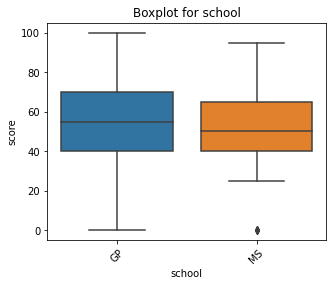

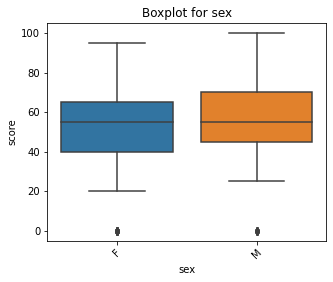

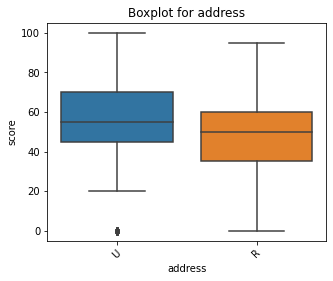

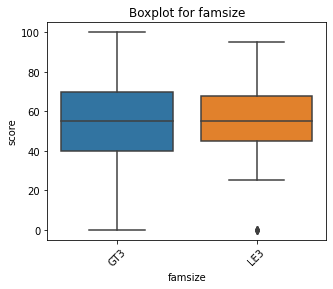

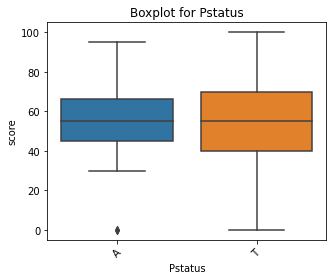

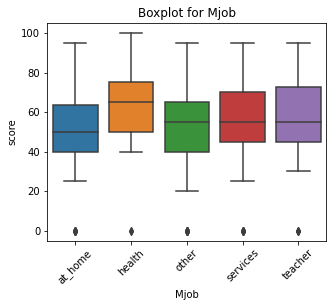

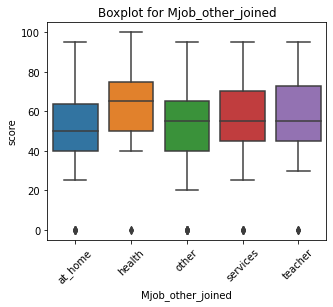

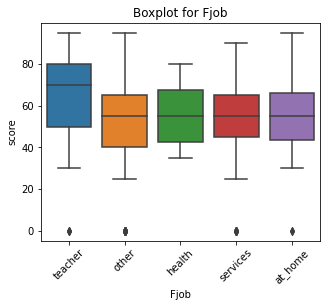

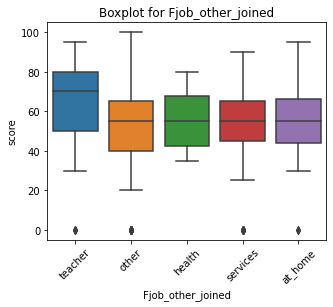

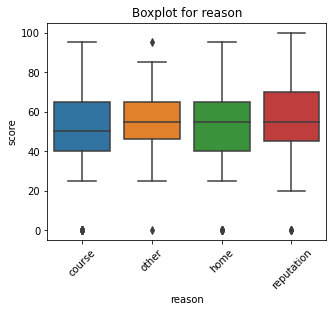

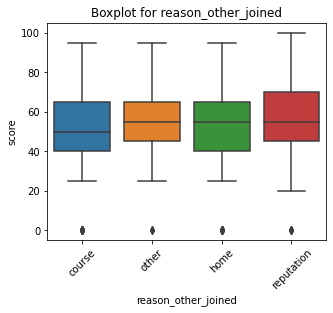

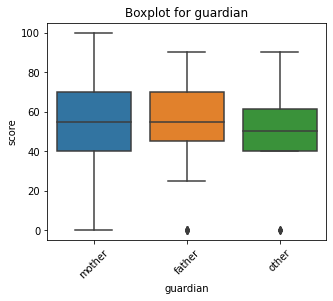

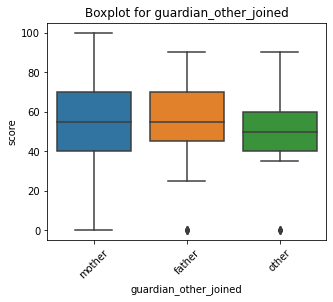

In [9]:
def show_boxplot(frame, column):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(x=column, y='score', data=frame, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# take a look at remaining strings
for item in string_fields:
    if(item not in bool_fields):
        show_boxplot(df, item)
        if item + '_other_joined' in df:
            show_boxplot(df, item + '_other_joined')


Гипотеза о том, что можно получить что-то более осмысленное, объединив `NaN` и `other` не подтвердилась.

In [14]:
# everything else with two values to number
df['school_to_num'] = df['school'].apply(
    lambda x: None if pd.isnull(x) else (1 if x == 'MS' else 0))
df['sex_to_num'] = df['sex'].apply(
    lambda x: None if pd.isnull(x) else (1 if x == 'M' else 0))
df['address_to_num'] = df['address'].apply(
    lambda x: None if pd.isnull(x) else (1 if x == 'R' else 0))
df['famsize_to_num'] = df['famsize'].apply(
    lambda x: None if pd.isnull(x) else (1 if x == 'LE3' else 0))
df['Pstatus_to_num'] = df['Pstatus'].apply(
    lambda x: None if pd.isnull(x) else (1 if x == 'T' else 0))
df['guardian_to_num'] = df['guardian'].apply(lambda x: None if (
    pd.isnull(x) or x == 'other') else (1 if x == 'father' else 0))
df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score,absences_flat_cleaned,absences_experimentally_mapped,internet_to_num,romantic_to_num,higher_to_num,nursery_to_num,activities_to_num,paid_to_num,famsup_to_num,schoolsup_to_num,school_to_num,sex_to_num,address_to_num,famsize_to_num,Pstatus_to_num,guardian_to_num
age,1.000000,-0.156606,-0.174493,0.081508,-0.015556,0.228047,0.015556,0.068853,0.029023,0.135107,-0.065946,0.093592,-0.155726,0.151493,0.165971,-0.108964,0.144440,-0.207837,-0.106453,-0.110231,-0.030502,-0.159311,-0.256343,0.377610,-0.028606,0.147902,0.022638,0.015458,-0.049613
Medu,-0.156606,1.000000,0.642325,-0.182011,0.079899,-0.237660,-0.079899,-0.087150,0.028196,0.051839,-0.039491,-0.018067,0.230728,0.050768,0.086483,0.205313,0.009082,0.157809,0.182957,0.088980,0.179683,0.193742,-0.051397,-0.144375,0.077180,-0.168314,-0.055604,-0.127922,-0.063313
Fedu,-0.174493,0.642325,1.000000,-0.147423,0.024000,-0.277091,-0.024000,-0.029155,-0.018049,0.040199,0.008538,0.022243,0.139615,-0.020560,0.071214,0.140583,0.017809,0.186909,0.170226,0.125219,0.109358,0.217911,0.047365,-0.095189,0.047336,-0.092243,-0.090400,-0.108911,0.089638
traveltime,0.081508,-0.182011,-0.147423,1.000000,-0.102206,0.064699,0.102206,-0.000097,-0.021937,0.037636,-0.021531,-0.048215,-0.070559,-0.047995,-0.060855,-0.086334,0.022876,-0.082866,-0.046749,-0.002043,-0.044878,-0.020651,-0.009752,0.254034,0.049019,0.285782,0.041872,0.081029,0.061692
studytime,-0.015556,0.079899,0.024000,-0.102206,1.000000,-0.178992,-1.000000,0.024435,-0.121969,-0.051280,-0.080016,-0.026544,0.115741,-0.078099,-0.054669,0.063471,0.055469,0.174532,0.083487,0.110905,0.201447,0.129236,0.031873,-0.092700,-0.307566,0.045182,-0.086096,0.007697,0.001591
failures,0.228047,-0.237660,-0.277091,0.064699,-0.178992,1.000000,0.178992,-0.009424,0.098382,0.120914,0.081284,0.057391,-0.344338,0.081801,0.091323,-0.065367,0.095931,-0.282585,-0.111398,-0.091205,-0.178898,-0.093340,0.006310,0.059999,0.040279,0.101835,0.002320,0.011092,0.019770
"studytime, granular",0.015556,-0.079899,-0.024000,0.102206,-1.000000,0.178992,1.000000,-0.024435,0.121969,0.051280,0.080016,0.026544,-0.115741,0.078099,0.054669,-0.063471,-0.055469,-0.174532,-0.083487,-0.110905,-0.201447,-0.129236,-0.031873,0.092700,0.307566,-0.045182,0.086096,-0.007697,-0.001591
famrel,0.068853,-0.087150,-0.029155,-0.000097,0.024435,-0.009424,-0.024435,1.000000,0.160189,0.060095,0.151774,-0.130516,0.005417,-0.080945,-0.068072,0.074065,-0.022850,0.003441,-0.013616,0.009505,0.068805,0.073847,0.026431,-0.079736,-0.001807,0.012805,-0.056839,0.102645,-0.032862
freetime,0.029023,0.028196,-0.018049,-0.021937,-0.121969,0.098382,0.121969,0.160189,1.000000,0.296437,0.061575,0.009292,0.019026,0.093436,-0.010600,0.093749,-0.036552,-0.050828,-0.041744,0.074122,-0.065099,-0.004149,-0.056599,0.035052,0.232925,-0.055708,0.026207,0.057306,0.003004
goout,0.135107,0.051839,0.040199,0.037636,-0.051280,0.120914,0.051280,0.060095,0.296437,1.000000,-0.015608,-0.048738,-0.129685,0.111587,0.113200,0.107363,0.009982,-0.022376,-0.006419,0.045012,0.032648,-0.040759,-0.037061,-0.006257,0.085922,-0.063285,0.028745,0.038323,-0.073977


,score,age,Medu,Fedu,studytime,failures,goout,romantic,address,paid,schoolsup,sex
score,1.000000,-0.155726,0.230728,0.139615,0.115741,-0.344338,-0.129685,-0.141320,-0.120067,0.099878,-0.088650,0.099285
age,-0.155726,1.000000,-0.156606,-0.174493,-0.015556,0.228047,0.135107,0.144440,0.147902,-0.030502,-0.256343,-0.028606
Medu,0.230728,-0.156606,1.000000,0.642325,0.079899,-0.237660,0.051839,0.009082,-0.168314,0.179683,-0.051397,0.077180
Fedu,0.139615,-0.174493,0.642325,1.000000,0.024000,-0.277091,0.040199,0.017809,-0.092243,0.109358,0.047365,0.047336
studytime,0.115741,-0.015556,0.079899,0.024000,1.000000,-0.178992,-0.051280,0.055469,0.045182,0.201447,0.031873,-0.307566
failures,-0.344338,0.228047,-0.237660,-0.277091,-0.178992,1.000000,0.120914,0.095931,0.101835,-0.178898,0.006310,0.040279
goout,-0.129685,0.135107,0.051839,0.040199,-0.051280,0.120914,1.000000,0.009982,-0.063285,0.032648,-0.037061,0.085922
romantic,-0.141320,0.144440,0.009082,0.017809,0.055469,0.095931,0.009982,1.000000,0.010859,0.049475,-0.067455,-0.134497
address,-0.120067,0.147902,-0.168314,-0.092243,0.045182,0.101835,-0.063285,0.010859,1.000000,-0.052925,-0.036284,-0.001084
paid,0.099878,-0.030502,0.179683,0.109358,0.201447,-0.178898,0.032648,0.049475,-0.052925,1.000000,-0.030622,-0.107899


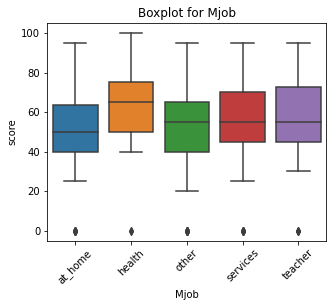

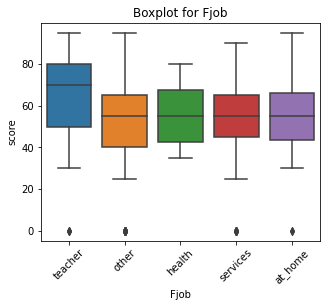

In [11]:
# Take every column with correlation > 0.1
# add Mjob and Fjob because their medions are different as can be seen on boxplots
# add paid, shoolsup, sex which have 0.9999..0.88 correlation to score, which seems not enough, however somehow close, which might be useful for some extended selections
# absences not included because 0.9 correlation was only found in a field which aggregated all extreme and unrealistic outliers, so it doesn't seem to be suitable

df_for_model = df.loc[:, ['score', 'age', 'Medu',
                          'Fedu', 'studytime', 'failures', 'goout']]
df_for_model['romantic'] = df['romantic_to_num']
df_for_model['address'] = df['address_to_num']
df_for_model['Mjob'] = df['Mjob']
df_for_model['Fjob'] = df['Fjob']
df_for_model['paid'] = df['paid_to_num']
df_for_model['schoolsup'] = df['schoolsup_to_num']
df_for_model['sex'] = df['sex_to_num']

display(df_for_model.corr())
show_boxplot(df_for_model, 'Mjob')
show_boxplot(df_for_model, 'Fjob')


**Итого, основные корреляции:**
1. Положительно - образование родителей, особенно матери, и время учебы.
2. Отрицательно - жизненные неудачи, романтические отношения, возраст, время на улице, жизнь в сельской местности
3. Слабо коррелируют, но, возможно, пригодятся для дополнительной фильтрации - платные курсы, образовательная поддержка в школе, пол, профессия родителей

Между сильной и слабой корреляцией я проводил границу по значению `0.1`, то есть, строго говоря, это довольно условно.

*К сожалению, был огромный завал последний месяц, поэтому кучу всего не успел, да и на модуль не было времени сколько хотел*